In [3]:
%matplotlib inline

# Some advanced visualization tools

## Outline

Using plotting functions with **rich parameters**:

- display mode
- cut coords

Adding **layers** to the plot:

- add edges
- add contours


### Notes:

All options demonstrating here are from **`nilearn.plotting.displays.OrthoSlicer`**. A class implemented to create 3 linked axes for plotting orthogonal cuts of 3D maps heavily used for Nilearn plotting tools.

In this section, we show how to use different **`display modes`** to plot the results in user specific directions. The current `display_mode` available in Nilearn plotting tools are `display_mode='ortho', 'x', 'xz', 'y', 'yx', 'yz', 'z'`. By default, all plotting tools use 'ortho' mode which means displaying along the x,y,z directions.

## Display modes and cut coords

**Defaults:** Plotting contrast maps using default **`display_mode='ortho'`** and **`cut_coords=None`**

In [1]:
 # localizer datasets from nilearn datasets module
from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_button_task(
    n_subjects=2,
    get_anats=True)
localizer_cmap_filename = localizer_dataset.cmaps[1]

In [2]:
# Plotting demonstration with default display_mode and cut_coords
from nilearn import plotting

plotting.plot_stat_map(localizer_cmap_filename, colorbar=False, title='Contrast map')

/home/mr243268/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Note:** By default, `display_mode='ortho'` displays slices in three (x, y, z) directions with cut_coords automatically positioned by itself without specifying them explicitly.

- ## **Positioning the cut of the coordinates**

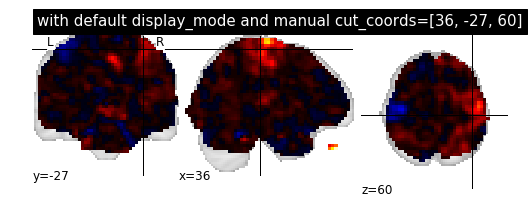

In [6]:
# Manually positioning the cut_coords to have a straight forward cut towards activations
plotting.plot_stat_map(localizer_cmap_filename, cut_coords=[36, -27, 60], colorbar=False,
                       title='with default display_mode and manual cut_coords=[36, -27, 60]')

- ## **Display only one direction: `display_mode='z'`**

Here we will use an integer in cut_coords

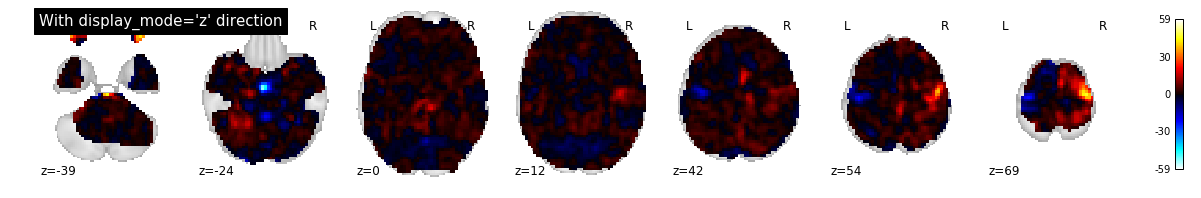

In [7]:
# With display_mode='z' direction 
plotting.plot_stat_map(localizer_cmap_filename, display_mode='z',
                      title="With display_mode='z' direction")

**Note:** Default `cut_coords` can project 7 different 'x' directional slices. To restrict the number of slices, we can use `cut_coords` to specific number of slices as we want as shown below.

### **Difference between `cut_coords` in being a list and being a single integer**

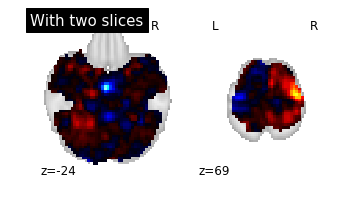

In [8]:
# manually controlling to display only two slices
# but not manually controlling the positioning of the coordinates
plotting.plot_stat_map(localizer_cmap_filename, display_mode='z', cut_coords=2,
                      title="With two slices", colorbar=False)

### **Plots in two different cut directions**

We can specific `display_mode='xz'` to have two cuts in different directions (we could also specific 'xy', or 'yz'

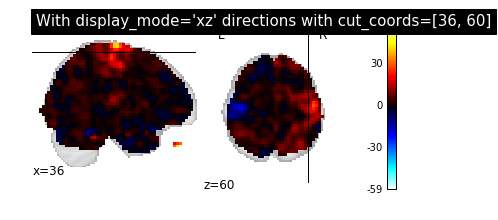

In [9]:
# Display two different modes 'xz' and manually setting two different coordinates for
# both directions (36, 60)
plotting.plot_stat_map(localizer_cmap_filename, display_mode='xz', cut_coords=[36, 60],
                       title="With display_mode='xz' directions with cut_coords=[36, 60]")

**Note:** There is a **huge difference** between setting the parameter specifically `cut_coords` as single integer like `cut_coords=5` than `cut_coords=[5]`.

According to the implementation, **`cut_coords=[5]`** will display the images in 5 slices and positioning the coordinated in **5th slice location**. Whereas **`cut_coords=5`** will simply display 5 slices with automatic positioning of **5 slices** by itself as you have observed in above plotting demonstration.

# Using Orthoslicer utilities: `add_edges`, `add_contours`

Different types of objects available are `add_edges`, `add_contours` can be used for displaying their end results such as 3D maps image on anatomical/EPI templates.

These objects are inherited automatically when you import plotting functions which means there is in no need of explicitly importing these objects.

**Note:** Help on `nilearn.plotting.displays.OrthoSlicer` for more information.


In [10]:
# We import datasets specifically useful for this demonstration
from nilearn import datasets

haxby_dataset = datasets.fetch_haxby(n_subjects=1)
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# Take the mean of the functional datasets in time domain, we import mean_img
from nilearn.image import mean_img
mean_functional_image = mean_img(haxby_func_filename)

- ## `add_edges`


We use the **return value** of the plotting functions from which we can use directly **`add_edges`**.

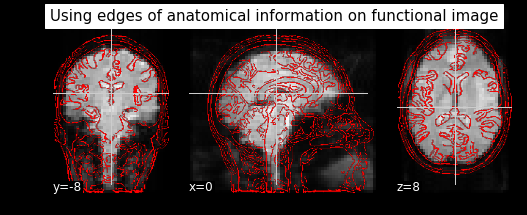

In [12]:
from nilearn import plotting

# we use the return value of the plotting functions from which we can use directly add_edges 
display = plotting.plot_anat(mean_functional_image,
                             title="Using edges of anatomical information on functional image")

# Two parameters, first argument:anatomical image to overlay, second argument:color
display.add_edges(haxby_anat_filename, color='r')

- ## ** `add_contours`**

First argument:mask image/roi image.

Second argument:filled=True specifically for contour fillings.


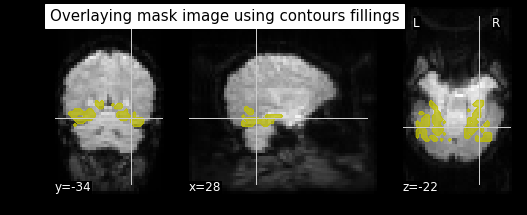

In [15]:
# Contours with fillings
display = plotting.plot_anat(mean_functional_image, cut_coords=[28, -34, -22],
                             title="Overlaying mask image using contours fillings")

# parameters, first argument:mask image/roi image, second argument:filled=True
# specifically for contour fillings

# compulsory extra keywords arguments such as levels, colors, alpha, etc can be
# used readily compatible with matplotlib pylab contourf function.

# More parameters used are filled=True and alpha=0.7 sets the transparency of the color
# inside contour fillings
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7, 
                     levels=[0.5], colors='y')

- # Overlaying statistical results as contours onto Glass Brain image



- We use statistical maps in 3D from localizer datasets for this demonstration.
- In this scenario, we simply replace plot_anat with plot_glass_brain as demonstrated previously.



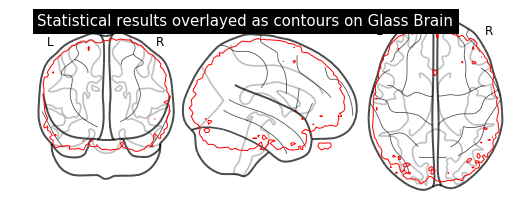

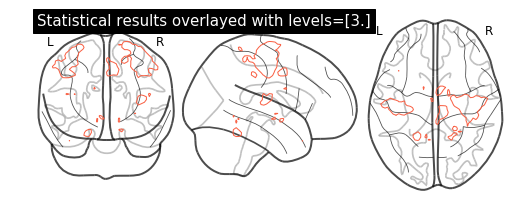

In [17]:
# Overlaying statistical results as contours onto Glass Brain image
# We use statistical maps in 3D from localizer datasets for this demonstration

localizer_dataset = datasets.fetch_localizer_button_task(
    n_subjects=2,
    get_anats=True)
localizer_tmap_filename = localizer_dataset.tmaps[1]

# We want to overlay the fetched map on Glass Brain.
# In this scenario, we simply replace plot_anat with plot_glass_brain as demonstrated previously.
display = plotting.plot_glass_brain(None,
                                    title='Statistical results overlayed as contours on Glass Brain')
# With levels=[1.]
display.add_contours(localizer_tmap_filename, levels=[1.], colors='r')

# Here, you can see the importance of setting levels=[3.] which acts
# mostly similar to threshold parameter as in plotting functions

display = plotting.plot_glass_brain(None,
                                    title='Statistical results overlayed with levels=[3.]')
# With levels=[3.]
display.add_contours(localizer_tmap_filename, levels=[3.], cmap='Reds')


**Note:** Statistical results in both negative and positive values using `add_contours` with `filled=True`.

- # Overlaying positive and negative values

In this setting, we show contour plots on glass brain with color fillings inside the contours
blue indicates the negative values, red indicates positive values.


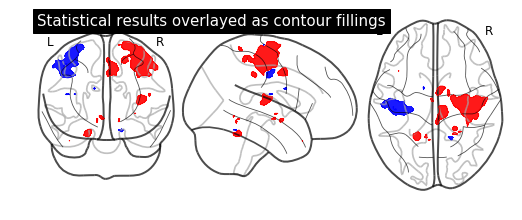

In [20]:
# In this setting, we show contour plots on glass brain with color fillings inside the contours
# blue indicates the negative values, red indicates positive values.
display = plotting.plot_glass_brain(None, title='Statistical results overlayed as contour fillings',
                                    plot_abs=False)
# positive statistical values
display.add_contours(localizer_tmap_filename, filled=True, levels=[3], colors='r', alpha=0.9)
# negative statistical values
display.add_contours(localizer_tmap_filename, filled=True, levels=[-4.7, -3], colors='b', alpha=0.9)

**Note:** if with only one value levels are from lower bound to infinity